# Title: An analysis to predict customer churn & improve customer retention

## Overview

The backbone of every business are those who patronize it, in this case customers. They are the ones that determine the value of products or services that businesses offer. Without the customer, there really is no business. Businesses strive to get new customers all the time but are also concerned with their existing customers coming back. This has made customer churn a very important metric for any serious company or business.
Customer churn is the loss of any customer for any reason possible. In this analysis we will be taking a look at the possible reasons for the loss of customers in a telecommunications company. We also aim to build predictive models that will identify customers that are likely to churn and the factors that lead to them doing so to enable the company to take proactive steps to keep customers.

## Setup

### Import Necessary Libraries

In [1]:
# Retrieving Data from Database
# import pyodbc

# Data handling
import pandas as pd
import numpy as np 

#  Visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Feature Processing 
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# Other packages
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from imblearn.combine import SMOTEENN
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
import random
from lime import lime_tabular
import shap
import matplotlib.gridspec as gs

#display all columns and rows 
pd.set_option('display.max_columns', None)

### Data Loading

The data was retrieved from a SQL database, a One Drive folder and github repository and stored on a local machine.

In [2]:
# Load 1st dataset
df1= pd.read_csv('Raw Data/Telco-churn-first-3000.csv')

# Load 2nd dataset
test = pd.read_excel('Raw Data/Telco-churn-second-2000.xlsx')

# Load 3rd dataset 
df3 = pd.read_csv('Raw Data/LP2_Telco-churn-last-2000.csv')

The 1st and 3rd datasets are to be concactenated to create a single dataset that would be used to train the models

In [3]:
# Concactenate datasets
train = pd.concat([df1, df3])

In [4]:
train.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1.0,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2.0,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3.0,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4.0,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [5]:
# Find the number of rows and columns
train.shape

(7086, 22)

In [6]:
# Get info on whole dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7086 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   float64
 1   customerID        7086 non-null   object 
 2   gender            7086 non-null   object 
 3   SeniorCitizen     7086 non-null   object 
 4   Partner           7086 non-null   object 
 5   Dependents        7086 non-null   object 
 6   tenure            7086 non-null   int64  
 7   PhoneService      7086 non-null   object 
 8   MultipleLines     6817 non-null   object 
 9   InternetService   7086 non-null   object 
 10  OnlineSecurity    6435 non-null   object 
 11  OnlineBackup      6435 non-null   object 
 12  DeviceProtection  6435 non-null   object 
 13  TechSupport       6435 non-null   object 
 14  StreamingTV       6435 non-null   object 
 15  StreamingMovies   6435 non-null   object 
 16  Contract          7086 non-null   object 


The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

In [7]:
# Drop Unnamed: 0 column
train= train.drop('Unnamed: 0', axis =1)

In [8]:
# Check columns 
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Get a description of numerical features
train.describe()

,tenure,MonthlyCharges
count,7086.000000,7086.000000
mean,32.597516,64.981329
std,24.483936,30.038249
min,0.000000,18.400000
25%,9.000000,35.762500
50%,30.000000,70.449997
75%,55.750000,89.900002
max,72.000000,118.650002


In [10]:
# Get summary statistics for all columns in churn_data
summary_stats = train.describe(include=['O'])
summary_stats

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7086,7086,7086,7086,7086,7086,6817,7086,6435,6435,6435,6435,6435,6435,7086,7086,7086,7081,7085
unique,5043,2,6,4,4,4,5,3,5,5,5,5,5,5,3,4,4,4870,4
top,5060-TQUQN,Male,False,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,2,3581,2525,2094,2824,3646,1974,3153,2058,1822,1846,1992,1656,1662,3847,2440,2396,10,2974


## Questions 

1. Does the gender of the customer affect the churn rate?
2. Are senior citizens more reluctant to churn than those who are not senior citizens?
3. How does the amount spent per month affect churn?
4. How important is tech support in customer retention?
5. Does internet service subscription affect the payment method used?
6. What tenure range is very likely to churn? 
7. Does having a partner and dependents influence churn rate positively or negatively?
8. Do customers with both phone service and internet service churn more than customers with one of the two?








## Hypothesis 

###### NULL : Customers on the yearly contracts are not likely to churn
###### ALTERNATE : Customers on the yearly contracts are more likely to churn

## Data Cleaning 

### Training Dataset

#### Missing Values

In [11]:
# Check for null values
train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

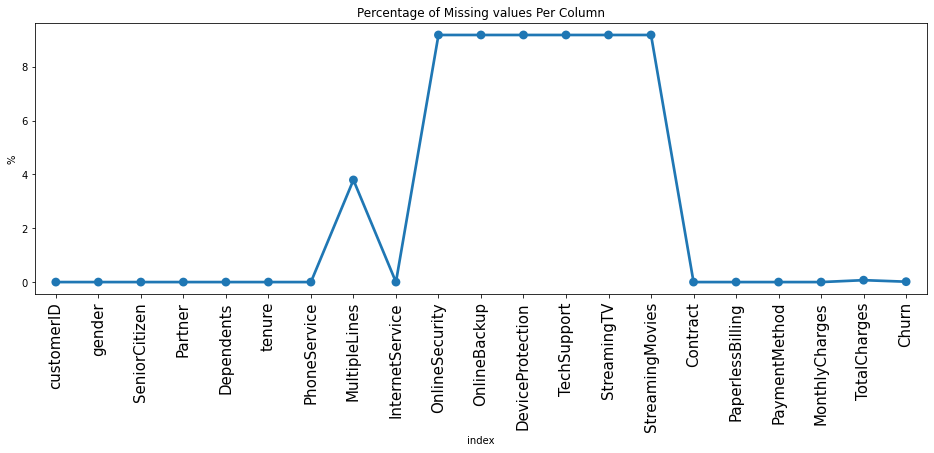

In [12]:
# Plot to show missing values per column

null_values= pd.DataFrame((train.isnull().sum())*100/train.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0,data=null_values)
plt.xticks(rotation =90,fontsize =15)
plt.title("Percentage of Missing values Per Column")
plt.ylabel("%")
plt.show()


For missing/null values, we will be filling them with the most frequent values


In [13]:
# Fill missing values wiht most frequent values in e
train = train.fillna(train.mode().iloc[0])

In [14]:
# Check for null values
train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Duplicates


In [15]:
train.shape

(7086, 21)

#### Check for duplicates 

In [16]:
# Find sum of duplicates
train.duplicated().sum()

0

In [17]:
# Drop duplicates 
train = train.drop_duplicates()

### Test Dataset

In [18]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [19]:
test.shape

(2000, 20)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


#### Missing Values

In [21]:
test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [22]:
test.duplicated().sum()

0

## EDA

#### Training Dataset

In this section we explore the dataset to get deeper insights

##### Customer ID Feature

In [23]:
train['customerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
2038    6840-RESVB
2039    2234-XADUH
2040    4801-JZAZL
2041    8361-LTMKD
2042    3186-AJIEK
Name: customerID, Length: 7086, dtype: object

Customer ID will not be needed for analysis and modeling so can be dropped

In [24]:
train = train.drop('customerID', axis=1)

##### Gender column

In [25]:
train['gender'].unique()

array(['Female', 'Male'], dtype=object)

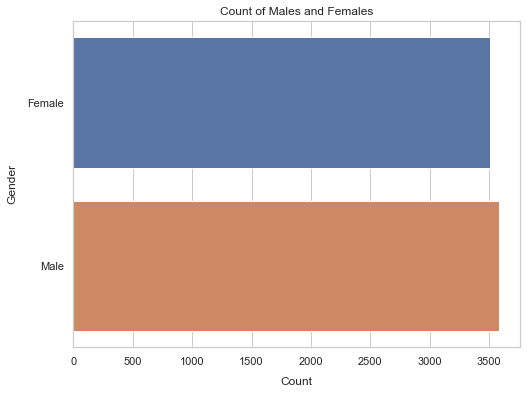

In [26]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='gender', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Gender", labelpad=10)
plt.title("Count of Males and Females", y=1)

# Show the plot
plt.show()

##### Senior Citizen column

In [27]:
train['SeniorCitizen'].unique()

array(['False', 'True', '0', '1', 0, 1], dtype=object)

In [28]:
# Change all entries under Senior Citizen to 0 or 1
replacement_values = {'False': 0, 'True': 1, '0': 0, '1': 1}

train['SeniorCitizen'] = train['SeniorCitizen'].replace(replacement_values)

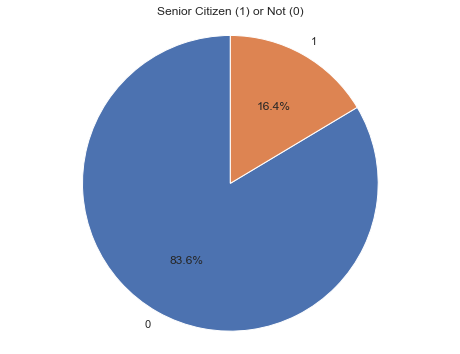

In [29]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['SeniorCitizen'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Senior Citizen (1) or Not (0)")

# Show the plot
plt.show()

##### Partner Column

In [30]:
train['Partner'].unique()

array(['True', 'False', 'No', 'Yes'], dtype=object)

In [31]:
# Change all entries under Partner to 'Yes' or 'No'
replacement_values = {'False': 'No', 'True': 'Yes'}

train['Partner'] = train['Partner'].replace(replacement_values)

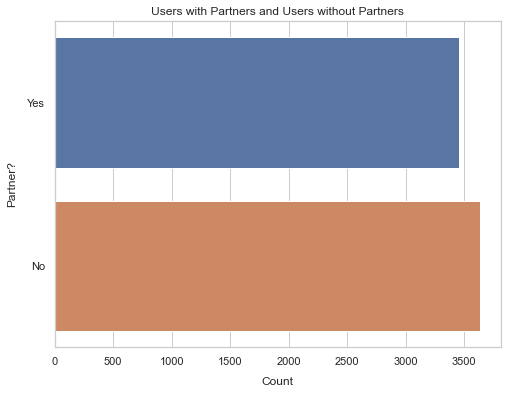

In [32]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='Partner', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Partner?", labelpad=10)
plt.title("Users with Partners and Users without Partners", y=1)

# Show the plot
plt.show()

##### Dependents

In [33]:
train['Dependents'].unique()

array(['False', 'True', 'No', 'Yes'], dtype=object)

In [34]:
# Change all entries under Dependednts to 'Yes' or 'No'
replacement_values = {'False': 'No', 'True': 'Yes'}

train['Dependents'] = train['Dependents'].replace(replacement_values)

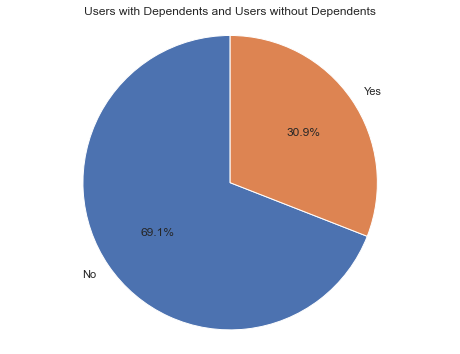

In [35]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['Dependents'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Users with Dependents and Users without Dependents")

# Show the plot
plt.show()

##### Tenure

In [36]:
train['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [37]:
train['tenure'].max()

72

In [38]:
train['tenure'].min()

0

In [39]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

train['tenure_range'] = pd.cut(train.tenure, range(1, 80, 12), right=False, labels=labels)

# Counts of each tenure range
train['tenure_range'].value_counts()

1 - 12     2142
61 - 72    1420
13 - 24    1034
25 - 36     842
49 - 60     840
37 - 48     797
Name: tenure_range, dtype: int64

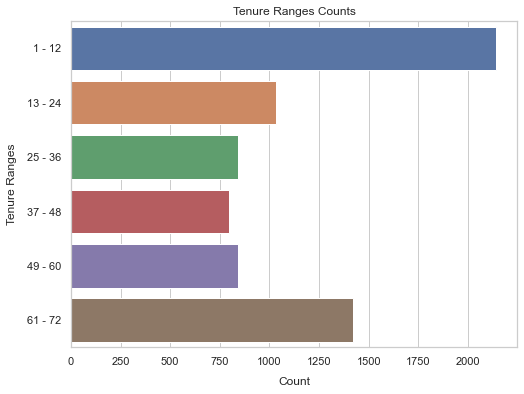

In [40]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='tenure_range', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Tenure Ranges", labelpad=10)
plt.title("Tenure Ranges Counts", y=1)

# Show the plot
plt.show()

##### PhoneService

In [41]:
train['PhoneService'].unique()

array(['False', 'True', 'Yes', 'No'], dtype=object)

In [42]:
# Change all entries under PhoneService to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['PhoneService'] = train['PhoneService'].replace(replacement_values)

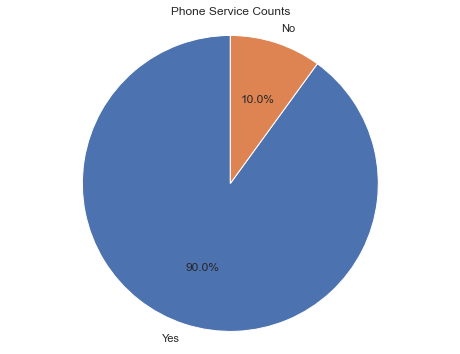

In [43]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['PhoneService'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Phone Service Counts")

# Show the plot
plt.show()

##### MultipleLines

In [44]:
train['MultipleLines'].unique()

array(['No', 'False', 'True', 'No phone service', 'Yes'], dtype=object)

In [45]:
# Change all entries under MultipleLines to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['MultipleLines'] = train['MultipleLines'].replace(replacement_values)

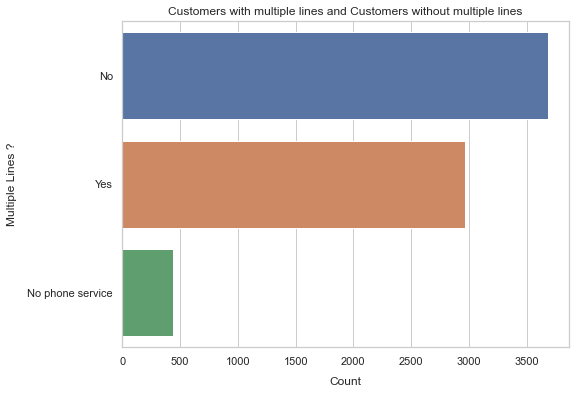

In [46]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='MultipleLines', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Multiple Lines ?", labelpad=10)
plt.title("Customers with multiple lines and Customers without multiple lines", y=1)

# Show the plot
plt.show()

##### Internet Service column

In [47]:
train['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [48]:
# Change all entries under Internet Service to 'Yes' or 'No'
replacement_values = {'Fiber optic': 'Yes', 'DSL':'Yes'}

train['InternetService'] = train['InternetService'].replace(replacement_values)

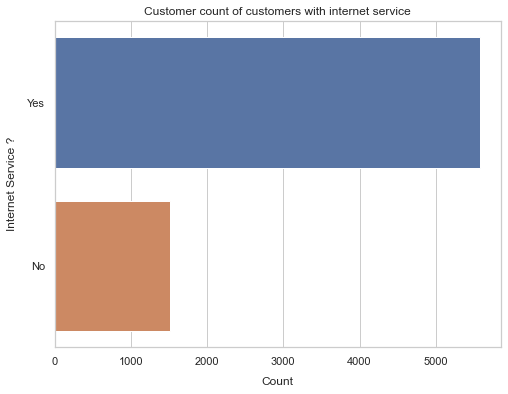

In [49]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='InternetService', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Internet Service ?", labelpad=10)
plt.title("Customer count of customers with internet service", y=1)

# Show the plot
plt.show()

##### Online Security 

In [50]:
train['OnlineSecurity'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [51]:
# Change all entries under Online Security to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['OnlineSecurity'] = train['OnlineSecurity'].replace(replacement_values)

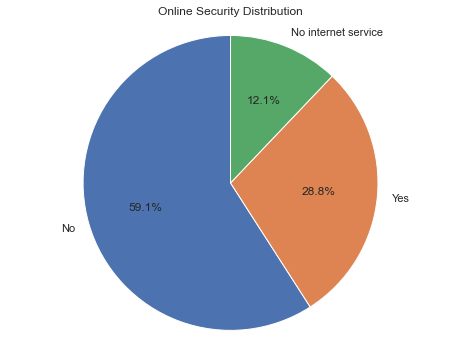

In [52]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['OnlineSecurity'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Online Security Distribution")

# Show the plot
plt.show()

##### OnlineBackup

In [53]:
train['OnlineBackup'].unique()

array(['True', 'False', 'No', 'Yes', 'No internet service'], dtype=object)

In [54]:
# Change all entries under Online Backup to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['OnlineBackup'] = train['OnlineBackup'].replace(replacement_values)

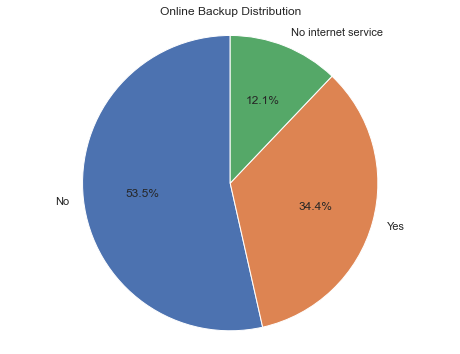

In [55]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['OnlineBackup'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Online Backup Distribution")

# Show the plot
plt.show()

##### Device Protection 

In [56]:
train['DeviceProtection'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [57]:
# Change all entries under DeviceProtection to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['DeviceProtection'] = train['DeviceProtection'].replace(replacement_values)

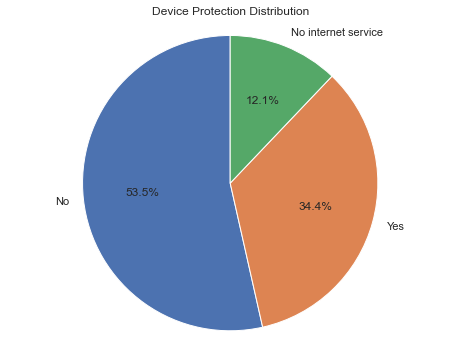

In [58]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['DeviceProtection'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Device Protection Distribution")

# Show the plot
plt.show()

##### TechSupport         

In [59]:
train['TechSupport'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [60]:
# Change all entries under Tech Support to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['TechSupport'] = train['TechSupport'].replace(replacement_values)

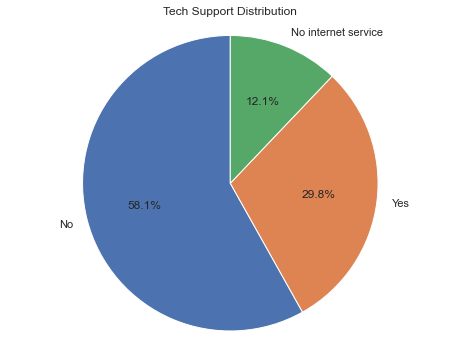

In [61]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['TechSupport'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Tech Support Distribution")

# Show the plot
plt.show()

##### StreamingTV 

In [62]:
train['StreamingTV'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [63]:
# Change all entries under Streaming TV to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['StreamingTV'] = train['StreamingTV'].replace(replacement_values)

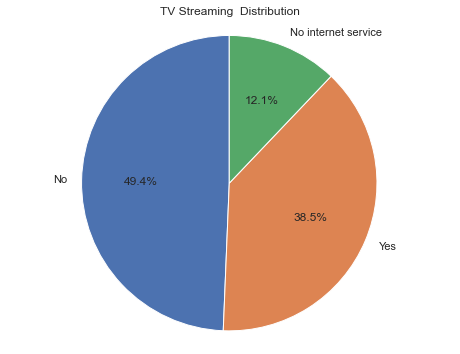

In [64]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['StreamingTV'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("TV Streaming  Distribution")

# Show the plot
plt.show()

##### StreamingMovies

In [65]:
train['StreamingMovies'].unique()

array(['False', 'True', 'No', 'Yes', 'No internet service'], dtype=object)

In [66]:
# Change all entries under Streaming Movies to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['StreamingMovies'] = train['StreamingMovies'].replace(replacement_values)

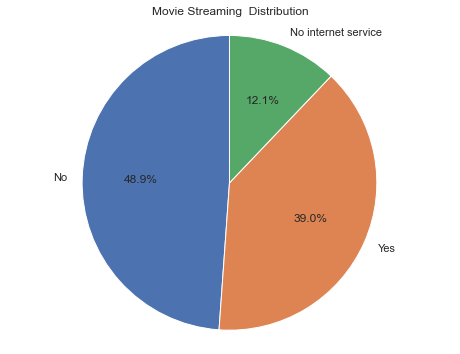

In [67]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['StreamingMovies'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Movie Streaming  Distribution")

# Show the plot
plt.show()

##### Contract

In [68]:
train['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

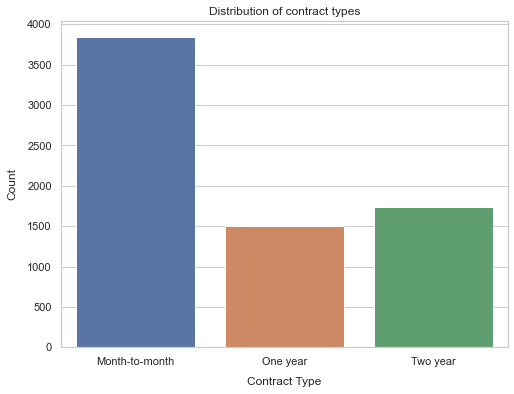

In [69]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(x='Contract', data=train)
plt.xlabel("Contract Type", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.title("Distribution of contract types", y=1)

# Show the plot
plt.show()

##### PaperlessBilling

In [70]:
train['PaperlessBilling'].unique()

array(['True', 'False', 'Yes', 'No'], dtype=object)

In [71]:
# Change all entries under PaperlessBilling to 'Yes' or 'No'
replacement_values = {'True': 'Yes', 'False':'No'}

train['PaperlessBilling'] = train['PaperlessBilling'].replace(replacement_values)

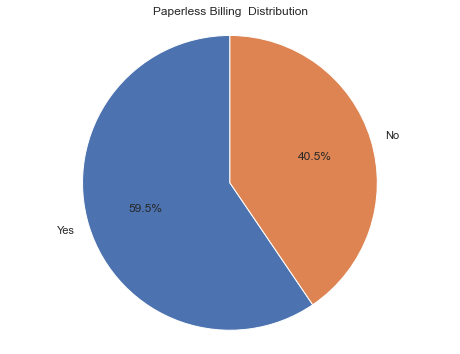

In [72]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['PaperlessBilling'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Paperless Billing  Distribution")

# Show the plot
plt.show()

##### PaymentMethod 

In [73]:
train['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

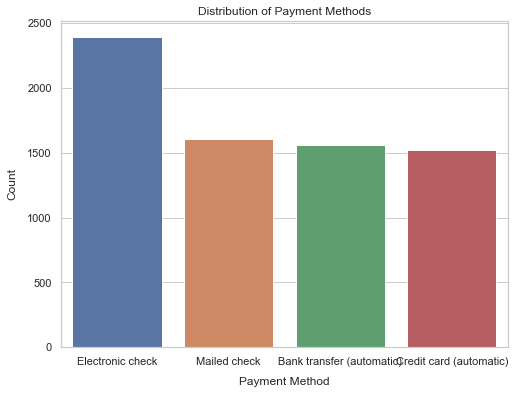

In [74]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(x='PaymentMethod', data=train)
plt.xlabel("Payment Method", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.title("Distribution of Payment Methods", y=1)

# Show the plot
plt.show()

##### MonthlyCharges 

In [75]:
train['MonthlyCharges']

0        29.850000
1        56.950001
2        53.849998
3        42.299999
4        70.699997
           ...    
2038     84.800000
2039    103.200000
2040     29.600000
2041     74.400000
2042    105.650000
Name: MonthlyCharges, Length: 7086, dtype: float64

In [76]:
train['MonthlyCharges'].max()

118.6500015258789

In [77]:
train['MonthlyCharges'].min()

18.399999618530273

In [78]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 19) for i in range(1, 119, 20)]

train['MonthlyCharges_range'] = pd.cut(train.MonthlyCharges, range(1, 120, 19), right=False, labels=labels)

# Counts of each tenure range
train['MonthlyCharges_range'].value_counts()

81 - 100     1769
61 - 80      1327
21 - 40      1201
101 - 120    1141
41 - 60       989
1 - 20        600
Name: MonthlyCharges_range, dtype: int64

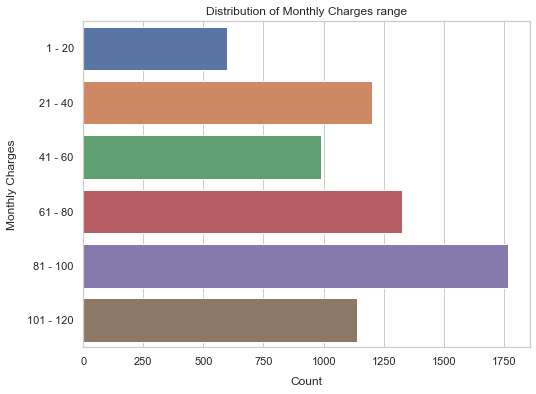

In [79]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  
# Create the horizontal bar plot
sns.countplot(y='MonthlyCharges_range', data=train)
plt.xlabel("Count", labelpad=10)
plt.ylabel("Monthly Charges", labelpad=10)
plt.title("Distribution of Monthly Charges range", y=1)

# Show the plot
plt.show()

##### TotalCharges 

In [80]:
train['TotalCharges']

0       29.850000381469727
1                   1889.5
2        108.1500015258789
3                  1840.75
4       151.64999389648438
               ...        
2038                1990.5
2039                7362.9
2040                346.45
2041                 306.6
2042                6844.5
Name: TotalCharges, Length: 7086, dtype: object

In [81]:
train['TotalCharges'].dtype

dtype('O')

In [82]:
# Replace empty cells with '0'
train['TotalCharges'] = train['TotalCharges'].str.replace('', '0')
train['TotalCharges'] = train['TotalCharges'].str.replace('0 0', '0')

In [83]:
train['TotalCharges'] = train['TotalCharges'].astype(float)

In [84]:
train['TotalCharges'].dtype

dtype('float64')

##### Churn

In [85]:
# Check for unique values
train['Churn'].unique()

array(['False', 'True', 'No', 'Yes'], dtype=object)

In [86]:
# Change all entries under churn to 'Yes' or 'No'
replacement_values = {'False': 'No', 'True': 'Yes'}

train['Churn'] = train['Churn'].replace(replacement_values)

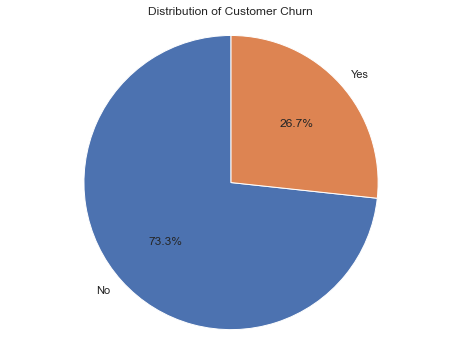

In [87]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Calculate the count of each category
counts = train['Churn'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Distribution of Customer Churn")

# Show the plot
plt.show()

The churn rate is 26.7%

## Questions and Answers

### Univariate Analysis 

In [88]:
# changing all column names to lower case
train.columns = train.columns.str.lower()

### 1. Does the gender of the customer affect the churn rate?


In [89]:
# Grouping the data by 'gender' and 'churn' and calculating the counts
grouped_data = train.groupby(['gender', 'churn']).size().reset_index(name='count')

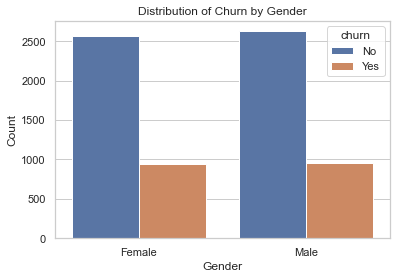

In [90]:
# Grouping the data by 'gender' and 'churn' and calculating the counts
grouped_data = train.groupby(['gender', 'churn']).size().reset_index(name='count')

# Set the style for the plot
sns.set_style("whitegrid")

# Create the grouped bar chart
ax = sns.barplot(data=grouped_data, x='gender', y='count', hue='churn')

# Set the labels and title
ax.set(xlabel='Gender', ylabel='Count', title='Distribution of Churn by Gender')

# Display the chart
plt.show()

938 females churned and 954 males churned. It is hard to tell if the gender of the customer affects the churn rate as the difference is not so significant

### 2. Are senior citizens more reluctant to churn than those who are not senior citizens?

In [91]:
# Grouping the data by 'SeniorCitizen' and 'Churn' and calculating the counts
grouped_data = train.groupby(['seniorcitizen', 'churn']).size().reset_index(name='count')

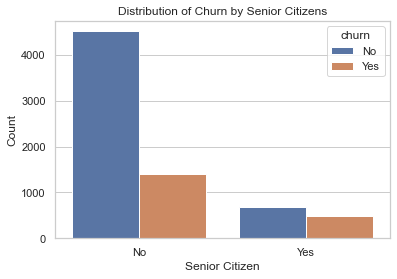

In [92]:
# Customizing the x-axis labels
x_labels = ['No', 'Yes']


# Set the style for the plot
sns.set_style("whitegrid")

# Create the grouped bar chart
ax = sns.barplot(data=grouped_data, x='seniorcitizen', y='count', hue='churn')

# Customize the x-axis labels
ax.set_xticklabels(x_labels)

# Set the labels and title
ax.set(xlabel='Senior Citizen', ylabel='Count', title='Distribution of Churn by Senior Citizens')

# Display the chart
plt.show()

Per the distribution, those that are not senior citizens are more likely to churn

### 3. How does the amount spent per month affect churn?

For this distribution, we would have to look at segmentation of the monthly charges

In [93]:
# Grouping the data by 'MonthlyCharges_range' and 'Churn' and calculating the counts
grouped_data = train.groupby(['monthlycharges_range', 'churn']).size().reset_index(name='count')

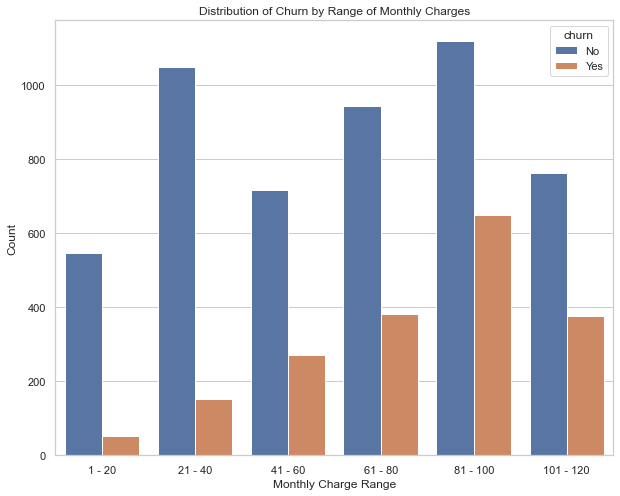

In [94]:
# Customizing the chart layout
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create the grouped bar chart
ax = sns.barplot(data=grouped_data, x='monthlycharges_range', y='count', hue='churn')

# Set the labels and title
ax.set(xlabel='Monthly Charge Range', ylabel='Count', title='Distribution of Churn by Range of Monthly Charges')

# Display the chart
plt.show()

Customers that spend between 80 to 101 dollars monthly are more likely to churn than any other group

### 4. How important is tech support in customer retention?

In [95]:
# Grouping the data by 'TechSupport' and 'Churn' and calculating the counts
grouped_data = train.groupby(['techsupport', 'churn']).size().reset_index(name='count')


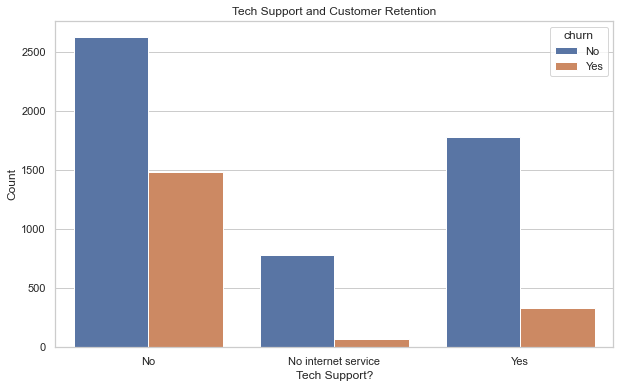

In [96]:
# Customizing the chart layout
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the grouped bar chart
ax = sns.barplot(data=grouped_data, x='techsupport', y='count', hue='churn')

# Set the labels and title
ax.set(xlabel='Tech Support?', ylabel='Count', title='Tech Support and Customer Retention')

# Display the chart
plt.show()

5,576 had internet service. Out of this number, 3,467 did not opt for tech support and 2,109 customers opted for tech support. Comparing this with churn, customers who chose not to go for tech support were more likely(1448 customers) to churn than those who subscribed for tech support(331 customers). With the difference in the sum of yes and no responses being close, it means tech support is important for customer retention

### 5. Does internet service subscription affect the payment method used?

In [97]:
# Grouping the data by 'MonthlyCharges_range' and 'Churn' and calculating the counts
grouped_data = train.groupby(['internetservice', 'paymentmethod']).size().reset_index(name='count')

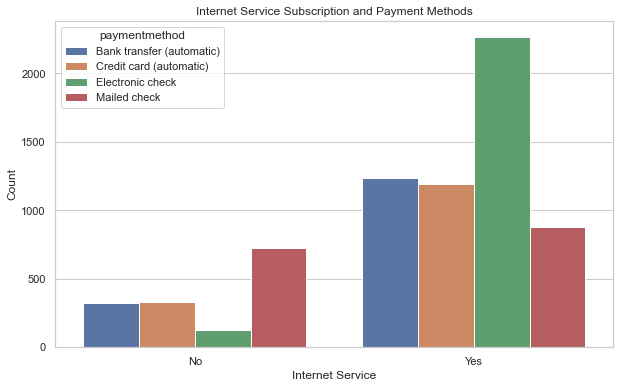

In [98]:
# Customizing the chart layout
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the grouped bar chart
ax = sns.barplot(data=grouped_data, x='internetservice', y='count', hue='paymentmethod')

# Set the labels and title
ax.set(xlabel='Internet Service', ylabel='Count', title='Internet Service Subscription and Payment Methods')

# Display the chart
plt.show()

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7086 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                7086 non-null   object  
 1   seniorcitizen         7086 non-null   int64   
 2   partner               7086 non-null   object  
 3   dependents            7086 non-null   object  
 4   tenure                7086 non-null   int64   
 5   phoneservice          7086 non-null   object  
 6   multiplelines         7086 non-null   object  
 7   internetservice       7086 non-null   object  
 8   onlinesecurity        7086 non-null   object  
 9   onlinebackup          7086 non-null   object  
 10  deviceprotection      7086 non-null   object  
 11  techsupport           7086 non-null   object  
 12  streamingtv           7086 non-null   object  
 13  streamingmovies       7086 non-null   object  
 14  contract              7086 non-null   object  
 15  pape

### 6. What tenure range is very likely to churn? 

In [100]:
# Grouping the data by 'MonthlyCharges_range' and 'Churn' and calculating the counts
grouped_data = train.groupby(['tenure_range', 'churn']).size().reset_index(name='count')

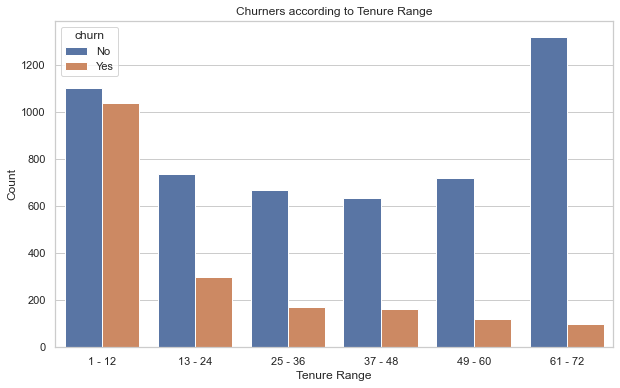

In [101]:
# Customizing the chart layout
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the grouped bar chart
ax = sns.barplot(data=grouped_data, x='tenure_range', y='count', hue='churn')

# Set the labels and title
ax.set(xlabel='Tenure Range', ylabel='Count', title='Churners according to Tenure Range')

# Display the chart
plt.show()

The company is most likely to lose a customer in the first 12 months of the customer's tenure than at any other time

### Bivariate and Multivariate Analysis

### 7. Does having a partner and dependents influence churn rate positively or negatively?

In [102]:
# Filter the data for customers who answered 'Yes' under 'Partner' and 'Yes' under 'Dependents'
filtered_data = train[(train['partner'] == 'Yes') & (train['dependents'] == 'Yes')]


In [103]:
# Group the filtered data by 'Churn' and calculate the count
grouped_data = filtered_data.groupby('churn').size().reset_index(name='Count')


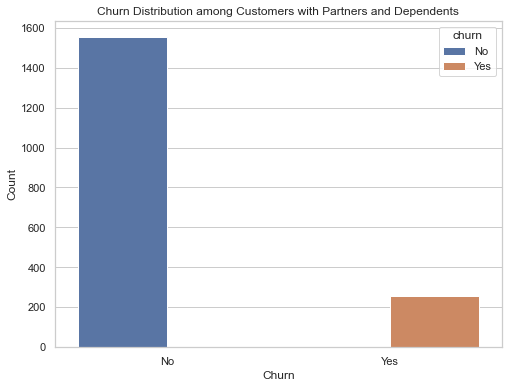

In [104]:
# Customizing the chart layout
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the bar chart
ax = sns.barplot(data=grouped_data, x='churn', y='Count', hue='churn')

# Set the labels and title
ax.set(xlabel='Churn', ylabel='Count', title='Churn Distribution among Customers with Partners and Dependents')

# Display the chart
plt.show()

In [105]:
# Filter the data for customers who answered 'No' under 'Partner' and 'No' under 'Dependents'
filtered_data = train[(train['partner'] == 'No') & (train['dependents'] == 'No')]

In [106]:
# Group the filtered data by 'Churn' and calculate the count
grouped_data = filtered_data.groupby('churn').size().reset_index(name='Count')

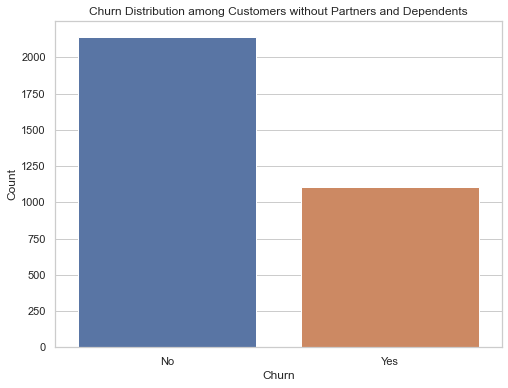

In [107]:
# Customizing the chart layout
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the bar chart
ax = sns.barplot(data=grouped_data, x='churn', y='Count')

# Set the labels and title
ax.set(xlabel='Churn', ylabel='Count', title='Churn Distribution among Customers without Partners and Dependents')

# Display the chart
plt.show()

Churn rate of customers with partners and dependents was 14% while churn rate of customers without partners and dependents was 34%

### 8. Do customers with both phone service and internet service churn more than customers with one of the two?

In [108]:
# Filter the data for customers who answered Yes' under 'PhoneService' and'Yes' under 'InternetService' 
filtered_data = train[(train['phoneservice'] == 'Yes') &  (train['internetservice'] == 'Yes')]
filtered_data

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_range,monthlycharges_range
1,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1.080809e+07,No,25 - 36,41 - 60
2,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,1.000800e+05,Yes,1 - 12,41 - 60
4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,1.050101e+05,Yes,1 - 12,61 - 80
5,Female,0,No,No,8,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,8.020001e+05,Yes,1 - 12,101 - 120
6,Male,0,No,Yes,22,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1.090409e+07,No,13 - 24,81 - 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,Male,0,No,No,19,Yes,No,Yes,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.700000,1.040905e+07,No,13 - 24,81 - 100
2038,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1.090900e+07,No,13 - 24,81 - 100
2039,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7.030602e+07,No,61 - 72,101 - 120
2041,Male,1,Yes,No,4,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,3.000601e+05,Yes,1 - 12,61 - 80


In [109]:
# Calculate churn rate for customers with phone service or internet service
churn_rate = filtered_data['churn'].value_counts() / len(filtered_data) * 100

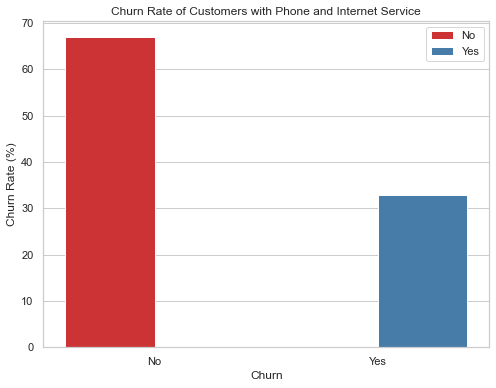

In [110]:
# Customizing the chart layout
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the bar chart
ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, hue=churn_rate.index, palette='Set1')

# Set the labels and title
ax.set(xlabel='Churn', ylabel='Churn Rate (%)', title='Churn Rate of Customers with Phone and Internet Service')

# Display the chart
plt.show()

In [111]:
# Filter customers with phone service or internet service
has_phone_or_internet = train[(train['internetservice'] == 'Yes') | (train['phoneservice'] == 'Yes')]


In [112]:
# Calculate churn rate for customers with phone service or internet service
churn_rate = has_phone_or_internet['churn'].value_counts() / len(has_phone_or_internet) * 100

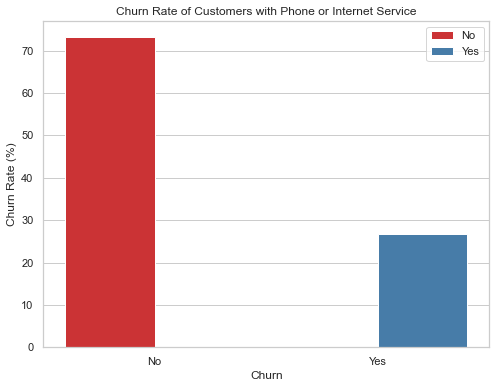

In [113]:
# Customizing the chart layout
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the bar chart
ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, hue=churn_rate.index, palette='Set1')

# Set the labels and title
ax.set(xlabel='Churn', ylabel='Churn Rate (%)', title='Churn Rate of Customers with Phone or Internet Service')

# Display the chart
plt.show()

Churn rate for customers with both Phone and Internet service is about 32.9% and Churn rate for customers with either Phone or Internet Service is 26.7%

### 9. What is the distribution of the churn rates of customers that have both internet service and online security against those that have internet service and no online security?

In [114]:
# Filter customers with internet service and online security
filtered_data1 = train[(train['internetservice'] == 'Yes') & (train['onlinesecurity'] == 'Yes')]

# Filter customers with internet service and no online security
filtered_data2 = train[(train['internetservice'] == 'Yes') & (train['onlinesecurity'] == 'No')]

In [115]:
# Calculate churn rate for customers with internet service and online security
churn_rate1 = filtered_data1['churn'].value_counts() / len(filtered_data1) * 100
churn_rate1

No     85.105341
Yes    14.894659
Name: churn, dtype: float64

In [116]:
churn_rate2 = filtered_data2['churn'].value_counts() / len(filtered_data2) * 100
churn_rate2

No     58.286199
Yes    41.713801
Name: churn, dtype: float64

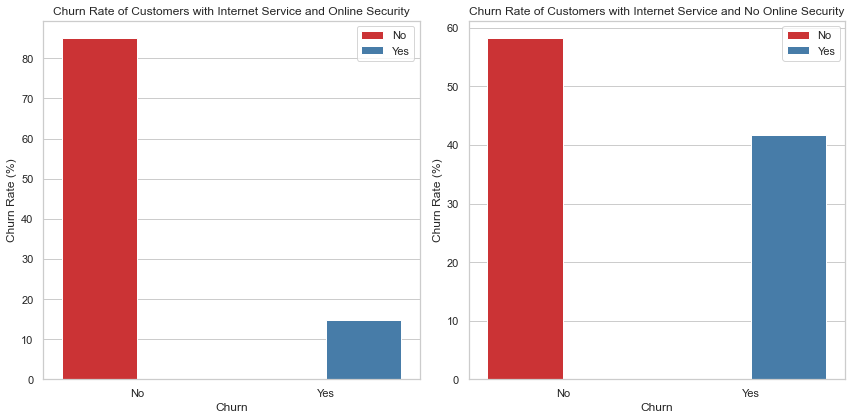

In [117]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Customizing the chart layout
sns.set_style("whitegrid")

# Plotting the first subplot - Churn Rate of Customers with Internet Service and Online Security
sns.barplot(ax=axes[0], x=churn_rate1.index, y=churn_rate1.values, hue=churn_rate1.index, palette='Set1')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_title('Churn Rate of Customers with Internet Service and Online Security')

# Plotting the second subplot - Churn Rate of Customers with Internet Service and No Online Security
sns.barplot(ax=axes[1], x=churn_rate2.index, y=churn_rate2.values, hue=churn_rate2.index, palette='Set1')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_title('Churn Rate of Customers with Internet Service and No Online Security')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

Customers with internet service and online security had a churn rate of 14.9% whereas customers with internet service and no online security had a churn rate of 41.7%

## Hypothesis Testing

In [118]:
# Filter customers that have month to month contracts
month = (train['contract'] == 'Month-to-month')
month.head()

# Filter customers that have contracts that are one year and two year
year = (train['contract'] == 'One year') & (train['contract'] == 'Two year')
year.head()

0    False
1    False
2    False
3    False
4    False
Name: contract, dtype: bool

In [119]:
# Calculate churn rate for customers with month to month contracts
# churn_month = month['Churn'].value_counts() / len(month) * 100
# churn_month

churn_month = month.value_counts() / len(month) * 100
churn_month


True     54.29015
False    45.70985
Name: contract, dtype: float64

In [120]:
# Calculate churn rate for customers with yearly contracts
churn_year = year.value_counts() / len(year) * 100
churn_year


False    100.0
Name: contract, dtype: float64

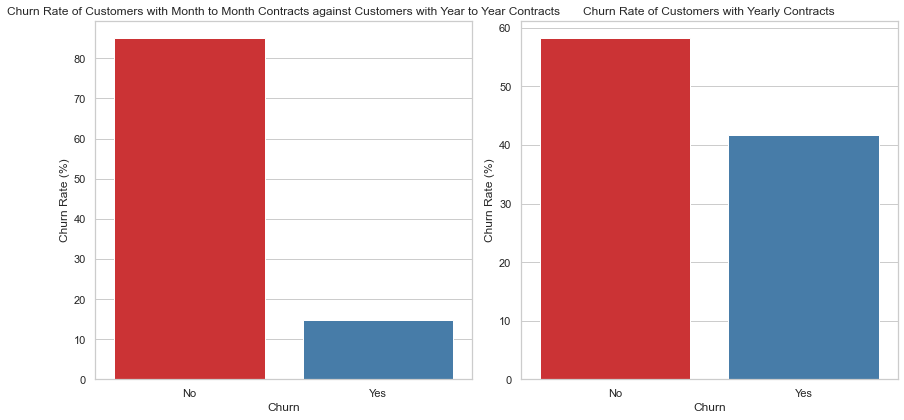

In [121]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Customizing the chart layout
sns.set_style("whitegrid")

# Plotting the first subplot - Churn Rate of Customers with Month to Month Contracts against Customers with Year to Year Contracts
sns.barplot(ax=axes[0], x=churn_rate1.index, y=churn_rate1.values, palette='Set1')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_title('Churn Rate of Customers with Month to Month Contracts against Customers with Year to Year Contracts')

# Plotting the second subplot - Churn Rate of Customers with Yearly Contracts
sns.barplot(ax=axes[1], x=churn_rate2.index, y=churn_rate2.values, palette='Set1')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_title('Churn Rate of Customers with Yearly Contracts')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()


### Customers on the Month to Month contract type had a higher churn rate than customers on the One Year or Two Year Contracts and so we reject the Null Hypothesis 

In [122]:
# make all column names lowercase in training dataset
train.columns = map(str.lower, train.columns)
train.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'tenure_range',
       'monthlycharges_range'],
      dtype='object')

In [123]:
# make all column names lowercase in test dataset
test.columns = map(str.lower, test.columns)
test.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

In [124]:
# Save datasets
train.to_csv('training_dataset.csv')
test.to_csv('testing_dataset.csv')

### Bivariate Analysis

### Violin Plot for Comparing Churn (Yes/No) vrs Monthly charges

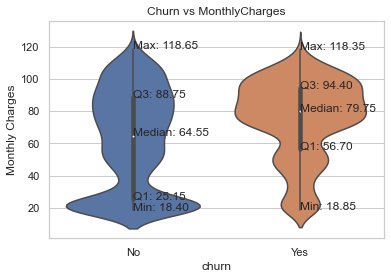

In [125]:
# Create a violin plot
ax = sns.violinplot(x='churn', y='monthlycharges', data=train)

# Add title and y-label
ax.set_title('Churn vs MonthlyCharges')
ax.set_ylabel('Monthly Charges')

# Add statistical values for the spread
for i, category in enumerate(train['churn'].unique()):
    data = train[train['churn'] == category]['monthlycharges']
    q1 = data.quantile(0.25)
    median = data.median()
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_whisker = data[data <= (q3 + 1.5*iqr)].max()
    lower_whisker = data[data >= (q1 - 1.5*iqr)].min()
    ax.text(i, upper_whisker, f"Max: {upper_whisker:.2f}")
    ax.text(i, q3, f"Q3: {q3:.2f}")
    ax.text(i, median, f"Median: {median:.2f}")
    ax.text(i, q1, f"Q1: {q1:.2f}")
    ax.text(i, lower_whisker, f"Min: {lower_whisker:.2f}")

# Set legend and show plot
#ax.legend(labels=['No Churn', 'Churn'])
plt.show()

### Monthly Charges vs. Total Charges (Correlation Analysis)

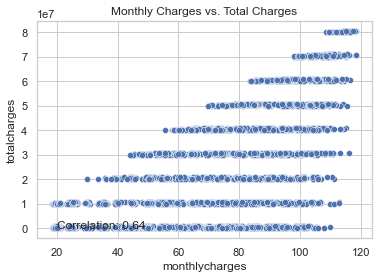

In [126]:
# Calculate correlation between MonthlyCharges and TotalCharges
corr = np.corrcoef(train['monthlycharges'], train['totalcharges'])[0, 1]

# Create scatter plot
sns.scatterplot(x='monthlycharges', y='totalcharges', data=train)
plt.title('Monthly Charges vs. Total Charges')

# Add correlation value to the plot
plt.text(20, 8000, f'Correlation: {corr:.2f}')

plt.show()

### Tenure vs. Total Charges (Correlation Analysis)

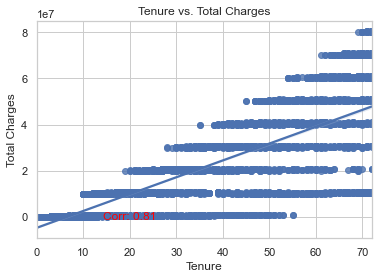

In [127]:
sns.regplot(x='tenure', y='totalcharges', data=train)
plt.title("Tenure vs. Total Charges")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")

# Calculate correlation coefficient
corr = train['tenure'].corr(train['totalcharges'])
corr_text = f'Corr: {corr:.2f}'

# Add correlation value to the plot
plt.text(20, 8000, corr_text, ha='center', va='center', color='red')

plt.show()

### BoxPlot Analysis: Monthly Charges Vrs all Categorical Variables

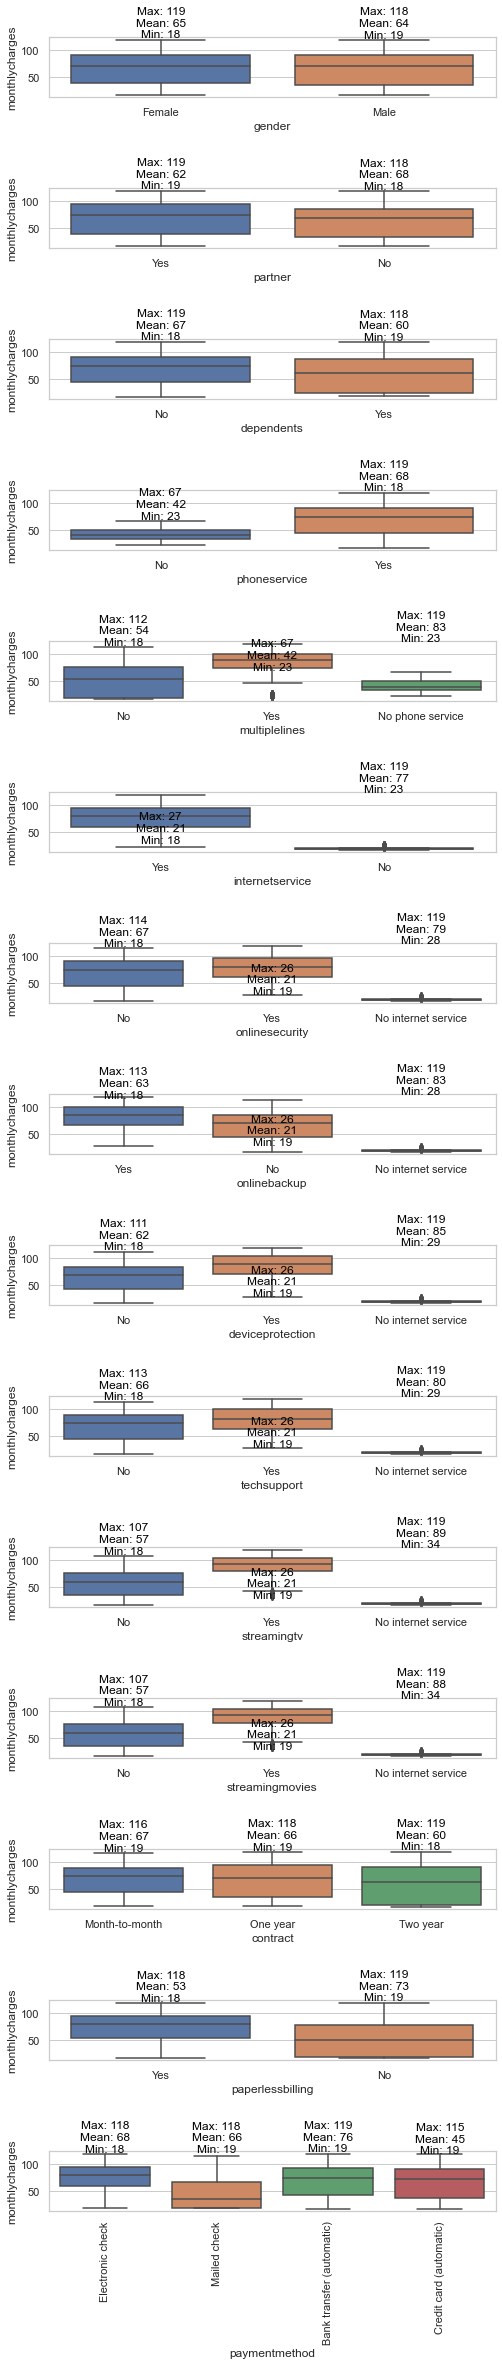

In [128]:
# Create a list of all categorical columns except Churn
cat_cols = train.select_dtypes(include=['object']).columns.drop(['churn'])

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=1.5, hspace=1.5)

# Loop through each categorical column and create a box plot with monthlycharges
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='monthlycharges', data=train, ax=axes[i])
    axes[i].set_xlabel(col)
    
    # Add mean, max, and min to the plot
    stats_df = train.groupby(col).agg({'monthlycharges': ['mean', 'max', 'min']})
    for idx, label in enumerate(stats_df.index):
        axes[i].text(idx, stats_df.loc[label, ('monthlycharges', 'max')], 
                      f"Max: {stats_df.loc[label, ('monthlycharges', 'max')]:.0f}\n"
                      f"Mean: {stats_df.loc[label, ('monthlycharges', 'mean')]:.0f}\n"
                      f"Min: {stats_df.loc[label, ('monthlycharges', 'min')]:.0f}", 
                      ha='center', va='bottom', color='black')
    
plt.xticks(rotation=90)
    
# Display the plot
plt.show()

### BoxPlot Analysis: Tenure Vrs all Categorical Variables

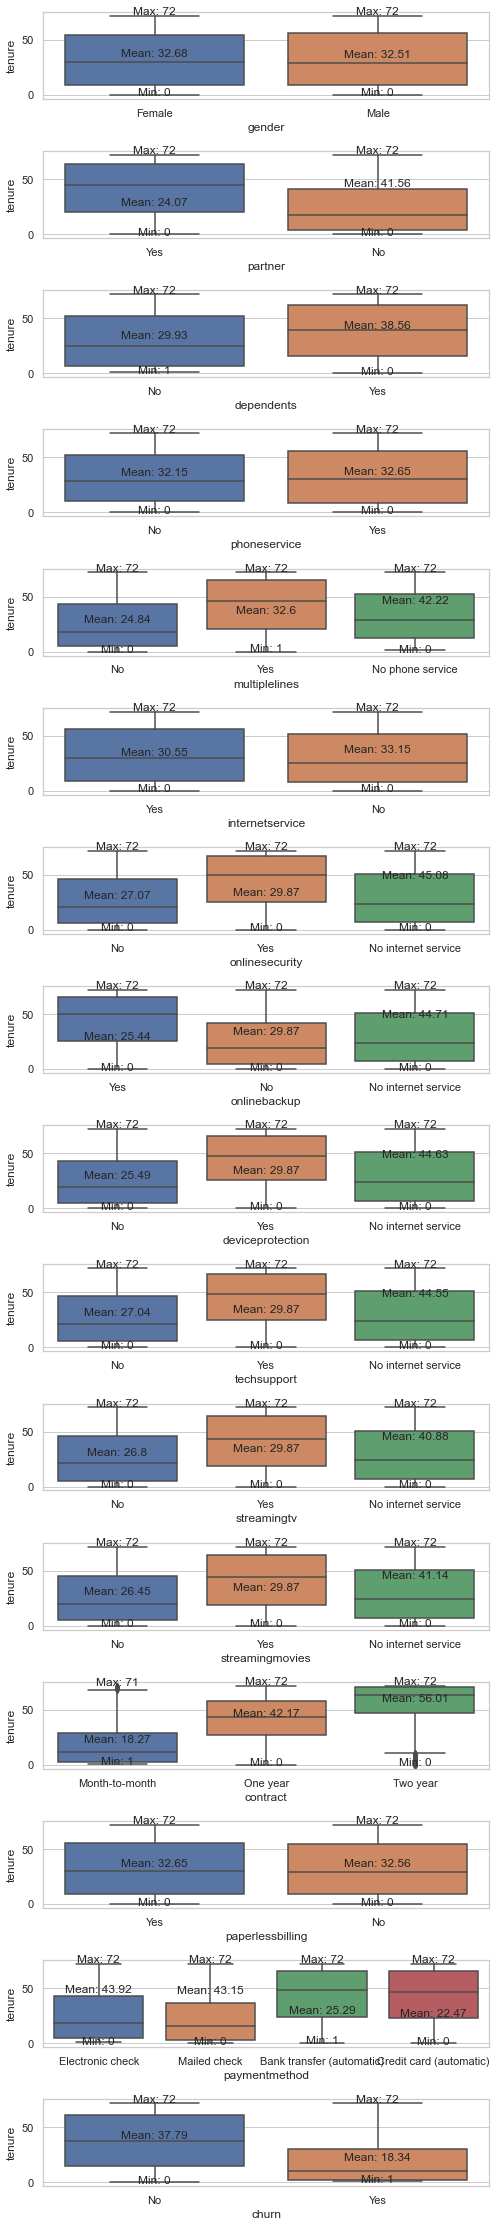

In [129]:
# Create a list of all categorical columns
cat_cols = list(train.select_dtypes(include=['object']).columns)

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

# Loop through each categorical column and create a box plot with tenure
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='tenure', data=train, ax=axes[i])
    axes[i].set_xlabel(col)
    
    # Add statistical values to the plot
    mean = round(train.groupby(col)['tenure'].mean(), 2)
    max_val = train.groupby(col)['tenure'].max()
    min_val = train.groupby(col)['tenure'].min()
    
    for j in range(len(mean)):
        axes[i].text(j, max_val[j]+1, f'Max: {max_val[j]}', ha='center')
        axes[i].text(j, mean[j], f'Mean: {mean[j]}', ha='center', va='bottom')
        axes[i].text(j, min_val[j]-1, f'Min: {min_val[j]}', ha='center')
    
# Display the plot
plt.show()


### BoxPlot Analysis: TotalCharges Vrs all Categorical Variables

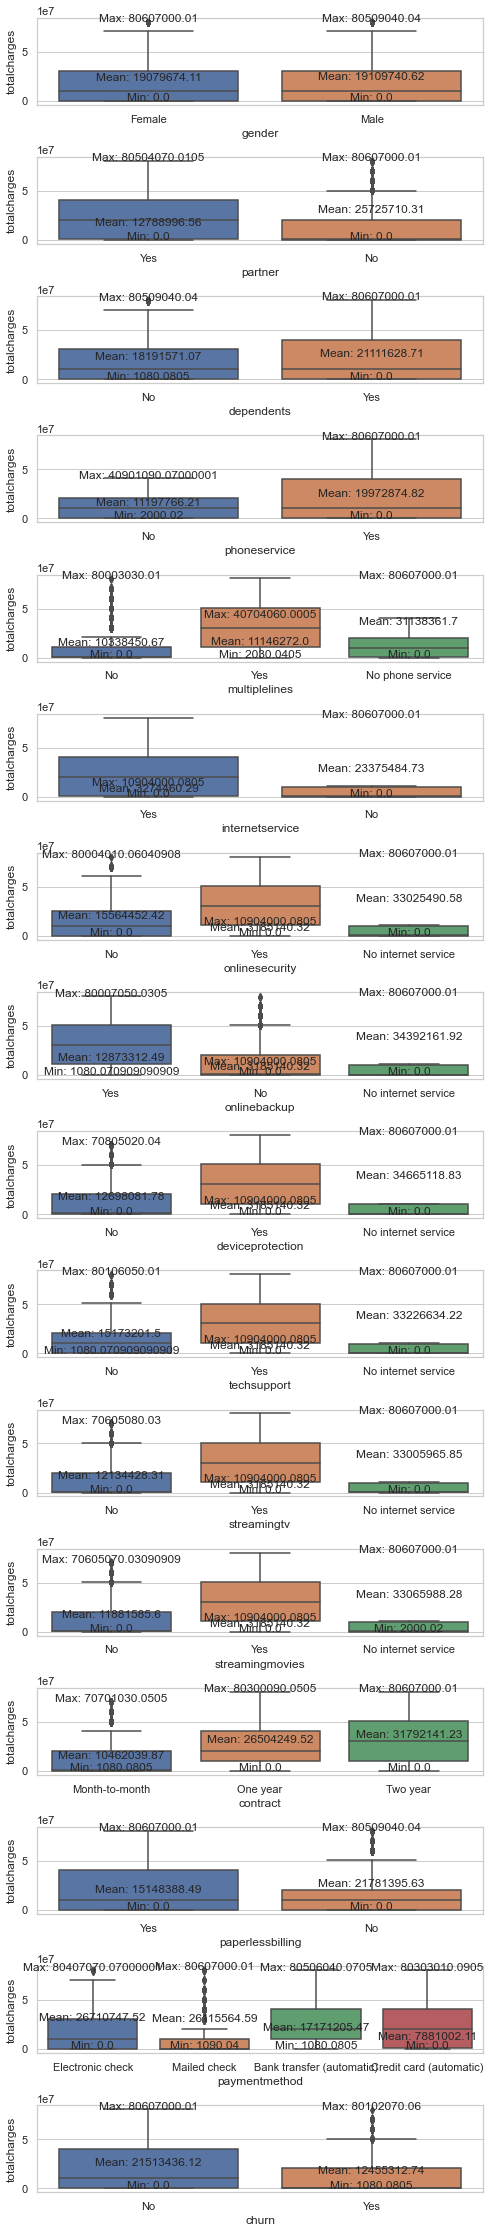

In [130]:
# Create a list of all categorical columns
cat_cols = list(train.select_dtypes(include=['object']).columns)

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

# Loop through each categorical column and create a box plot with tenure
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='totalcharges', data=train, ax=axes[i])
    axes[i].set_xlabel(col)
    
    # Add statistical values to the plot
    mean = round(train.groupby(col)['totalcharges'].mean(), 2)
    max_val = train.groupby(col)['totalcharges'].max()
    min_val = train.groupby(col)['totalcharges'].min()
    
    for j in range(len(mean)):
        axes[i].text(j, max_val[j]+1, f'Max: {max_val[j]}', ha='center')
        axes[i].text(j, mean[j], f'Mean: {mean[j]}', ha='center', va='bottom')
        axes[i].text(j, min_val[j]-1, f'Min: {min_val[j]}', ha='center')
    
# Display the plot
plt.show()


### Multivariate Analaysis

### Correlation between all the numerical attributes

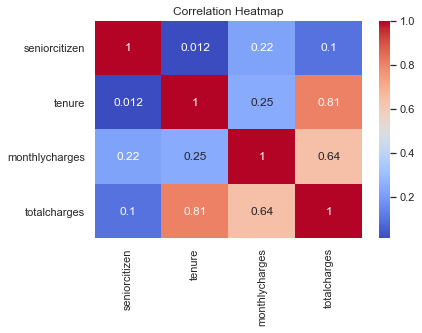

In [131]:
# Heatmap to visualize the correlation between all the numerical attributes in the dataset.
numeric_cols = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']
corr_matrix = train[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Monthly charges for each combination of internet service type and contract type

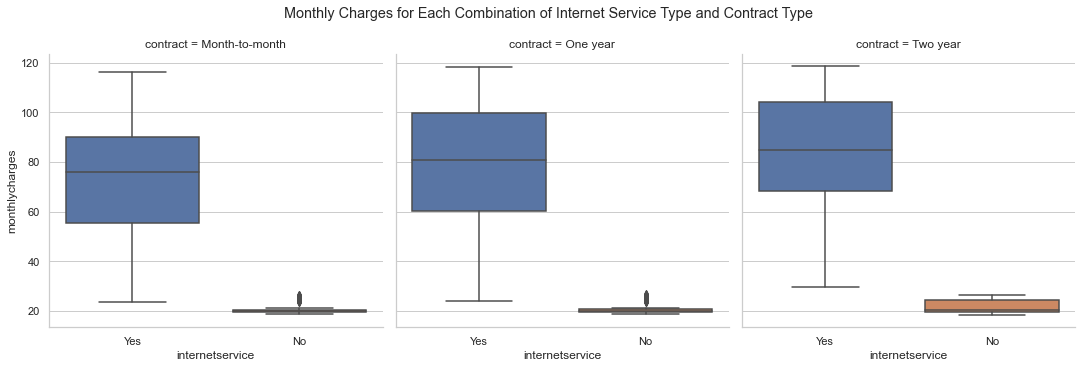

In [132]:
# Box plot of the monthly charges for each combination of internet service type and contract type.

# Filter the data for only the relevant columns
internet_contract = train[['internetservice', 'contract', 'monthlycharges']]

# Create the box plot
sns.catplot(x='internetservice', y='monthlycharges', col='contract', data=internet_contract, kind='box')

# Add plot titles and labels
plt.suptitle('Monthly Charges for Each Combination of Internet Service Type and Contract Type')
plt.subplots_adjust(top=0.85)
plt.show()

### Comparing the number of customers who churned and did not churn, grouped by internet service type and payment method

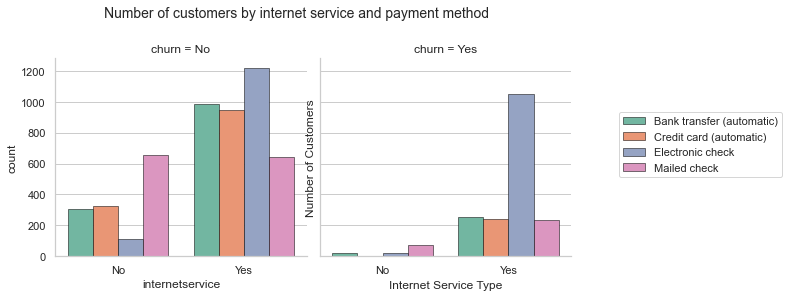

In [133]:
#Stacked bar chart to compare the number of customers who churned and did not churn, grouped by internet service type and payment method.

# Subset the data to include only relevant columns
train_sub = train[['churn', 'internetservice', 'paymentmethod']]

# Group by the variables and count the number of occurrences
churn_data_grouped = train_sub.groupby(['churn', 'internetservice', 'paymentmethod']).size().reset_index(name='count')

# Create a stacked bar chart
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.catplot(x='internetservice', y='count', hue='paymentmethod', col='churn', data=churn_data_grouped, kind='bar', height=4, aspect=1, legend=False, edgecolor='black', linewidth=0.5)

# Set the chart title and axes labels
plt.subplots_adjust(top=0.8)
plt.suptitle('Number of customers by internet service and payment method', fontsize=14)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.gcf().legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

## Machine Learning Modelling

### Data Loading

In [134]:
#Load train and test datasets
train_data= pd.read_csv("training_dataset.csv")
test_data = pd.read_csv("testing_dataset.csv")

#### Exploring train dataset

In [135]:
train_data

,Unnamed: 0,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_range,monthlycharges_range
0,0,Female,0,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,2.090081e+03,No,1 - 12,21 - 40
1,1,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1.080809e+07,No,25 - 36,41 - 60
2,2,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,1.000800e+05,Yes,1 - 12,41 - 60
3,3,Male,0,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1.080400e+07,No,37 - 48,41 - 60
4,4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,1.050101e+05,Yes,1 - 12,61 - 80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,2038,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1.090900e+07,No,13 - 24,81 - 100
7082,2039,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7.030602e+07,No,61 - 72,101 - 120
7083,2040,Female,0,Yes,Yes,11,No,No phone service,Yes,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,3.040600e+05,No,1 - 12,21 - 40
7084,2041,Male,1,Yes,No,4,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,3.000601e+05,Yes,1 - 12,61 - 80


In [136]:
train_data = train_data.drop(["Unnamed: 0", "tenure_range", "monthlycharges_range"], axis=1)
train_data

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,2.090081e+03,No
1,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1.080809e+07,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,1.000800e+05,Yes
3,Male,0,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1.080400e+07,No
4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,1.050101e+05,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1.090900e+07,No
7082,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7.030602e+07,No
7083,Female,0,Yes,Yes,11,No,No phone service,Yes,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,3.040600e+05,No
7084,Male,1,Yes,No,4,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,3.000601e+05,Yes


In [137]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7086 non-null   object 
 1   seniorcitizen     7086 non-null   int64  
 2   partner           7086 non-null   object 
 3   dependents        7086 non-null   object 
 4   tenure            7086 non-null   int64  
 5   phoneservice      7086 non-null   object 
 6   multiplelines     7086 non-null   object 
 7   internetservice   7086 non-null   object 
 8   onlinesecurity    7086 non-null   object 
 9   onlinebackup      7086 non-null   object 
 10  deviceprotection  7086 non-null   object 
 11  techsupport       7086 non-null   object 
 12  streamingtv       7086 non-null   object 
 13  streamingmovies   7086 non-null   object 
 14  contract          7086 non-null   object 
 15  paperlessbilling  7086 non-null   object 
 16  paymentmethod     7086 non-null   object 


In [138]:
# Count the number of samples in each class
class_counts = train_data['churn'].value_counts()

# Calculate the class proportions
class_proportions = class_counts / len(train_data)

print("Class Distribution:")
print(class_counts)

print("\nClass Proportions:")
print(class_proportions)

Class Distribution:
No     5194
Yes    1892
Name: churn, dtype: int64

Class Proportions:
No     0.732995
Yes    0.267005
Name: churn, dtype: float64


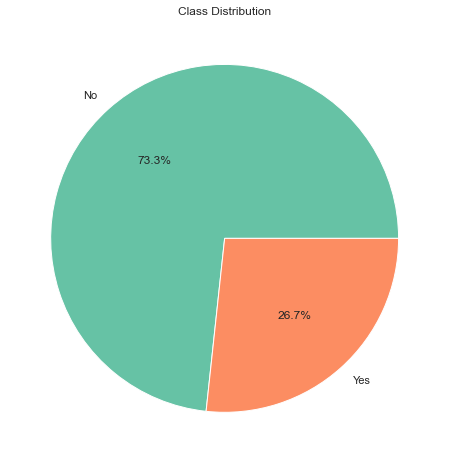

In [139]:
# Count the number of samples in each class
class_counts = train_data['churn'].value_counts()

# Get the class labels and their counts
labels = class_counts.index
counts = class_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

In [140]:
train_data.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7086.000000,7086.000000,7086.000000,7.086000e+03
mean,0.164126,32.597516,64.981329,1.909487e+07
std,0.370416,24.483936,30.038249,2.209079e+07
min,0.000000,0.000000,18.400000,0.000000e+00
25%,0.000000,9.000000,35.762500,4.010700e+05
50%,0.000000,30.000000,70.449997,1.030907e+07
75%,0.000000,55.750000,89.900002,3.080501e+07
max,1.000000,72.000000,118.650002,8.060700e+07


### Exploring test dataset

In [141]:
test_data

,Unnamed: 0,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [142]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2000 non-null   int64  
 1   customerid        2000 non-null   object 
 2   gender            2000 non-null   object 
 3   seniorcitizen     2000 non-null   int64  
 4   partner           2000 non-null   object 
 5   dependents        2000 non-null   object 
 6   tenure            2000 non-null   int64  
 7   phoneservice      2000 non-null   object 
 8   multiplelines     2000 non-null   object 
 9   internetservice   2000 non-null   object 
 10  onlinesecurity    2000 non-null   object 
 11  onlinebackup      2000 non-null   object 
 12  deviceprotection  2000 non-null   object 
 13  techsupport       2000 non-null   object 
 14  streamingtv       2000 non-null   object 
 15  streamingmovies   2000 non-null   object 
 16  contract          2000 non-null   object 


In [143]:
empty_strings = test_data[test_data["totalcharges"] == ' ']
empty_strings

,Unnamed: 0,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
331,331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
826,826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
1380,1380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,


In [144]:
# Convert empty strings to NaN
test_data["totalcharges"] = test_data["totalcharges"].replace(' ', np.nan)

# Convert the column to float
test_data["totalcharges"] = test_data["totalcharges"].astype(float)

# Calculate the column mean
mean_total_charges = test_data["totalcharges"].mean()

# Impute NaN values with the mean
test_data["totalcharges"].fillna(mean_total_charges, inplace=True)


In [145]:
is_dash_present = "-" in test_data.values
is_dash_present

False

In [146]:
is_empty_present = " " in test_data.values
is_empty_present

False

In [147]:
test_data = test_data.drop(["customerid"], axis=1 )
test_data

,Unnamed: 0,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,1996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30
1997,1997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70
1998,1998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [148]:
# make all column names lowercase
test_data.columns = map(str.lower, test_data.columns)
test_data

,unnamed: 0,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,1996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30
1997,1997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70
1998,1998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [149]:
test_data.describe()

,unnamed: 0,seniorcitizen,tenure,monthlycharges,totalcharges
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,0.161500,31.853000,63.933325,2235.995093
std,577.494589,0.368084,24.632677,30.136858,2258.097978
min,0.000000,0.000000,0.000000,18.250000,18.900000
25%,499.750000,0.000000,8.000000,34.250000,354.812500
50%,999.500000,0.000000,27.000000,69.800000,1389.475000
75%,1499.250000,0.000000,55.000000,89.275000,3626.262500
max,1999.000000,1.000000,72.000000,118.750000,8684.800000


In [150]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unnamed: 0        2000 non-null   int64  
 1   gender            2000 non-null   object 
 2   seniorcitizen     2000 non-null   int64  
 3   partner           2000 non-null   object 
 4   dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   phoneservice      2000 non-null   object 
 7   multiplelines     2000 non-null   object 
 8   internetservice   2000 non-null   object 
 9   onlinesecurity    2000 non-null   object 
 10  onlinebackup      2000 non-null   object 
 11  deviceprotection  2000 non-null   object 
 12  techsupport       2000 non-null   object 
 13  streamingtv       2000 non-null   object 
 14  streamingmovies   2000 non-null   object 
 15  contract          2000 non-null   object 
 16  paperlessbilling  2000 non-null   object 


### Split the Data into Training and Testing Sets

In [151]:
# Split the data into features (X) and target variable (y)
X = train_data.drop('churn', axis=1)
y = train_data['churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (5668, 19) (5668,)
Test set shape: (1418, 19) (1418,)


#### Feature Encoding (on Training and Test Data)

In [152]:
# Perform one-hot encoding on categorical variables in the training data
X_train_encoded = pd.get_dummies(X_train)

# Perform one-hot encoding on categorical variables in the test data
X_test_encoded = pd.get_dummies(X_test)

# Align the columns of the encoded test data with the encoded training data
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [153]:
# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_encoded, y_train)


### Feature scaling

In [154]:
# Scale the numeric features in the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [155]:
X_train_encoded

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_No,internetservice_Yes,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
3411,1,1,24.800000,2.040080e+03,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5776,0,71,19.850000,1.030206e+07,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0
5125,0,21,19.800000,3.050000e+05,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
530,0,24,21.100000,4.090001e+05,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0
6405,0,2,74.900000,1.030600e+05,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,69,81.950000,5.060001e+07,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
5191,0,65,99.350000,6.030407e+07,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0
5226,1,34,79.600000,2.070108e+07,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
5390,0,72,116.950000,8.050904e+07,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0


#### Logistic regression model for unbalanced dataset

In [156]:
# Initialize and train classification models
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

In [157]:
# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test_scaled)

In [158]:
# Calculate accuracy for logistic regression classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.808885754583921

In [159]:
# Classification report for Logistic Regression
classification_report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:\n", classification_report_lr)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.90      0.87      1044
         Yes       0.67      0.55      0.60       374

    accuracy                           0.81      1418
   macro avg       0.76      0.72      0.74      1418
weighted avg       0.80      0.81      0.80      1418



#### Logistic regression model for balanced dataset 

In [160]:
# Instantiate the logistic regression model
logistic_regression = LogisticRegression()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the logistic regression model on the resampled data
logistic_regression.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [161]:
# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test_scaled)
# Convert 'No' to 0 and 'Yes' to 1 in y_pred_lr
#y_pred_lr = np.where(y_pred_lr == 'No', 0, 1)


In [162]:
# Calculate accuracy for logistic regression classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.7016925246826516

In [163]:
classification_report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:\n", classification_report_lr)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.65      0.76      1044
         Yes       0.46      0.85      0.60       374

    accuracy                           0.70      1418
   macro avg       0.69      0.75      0.68      1418
weighted avg       0.80      0.70      0.72      1418



#### Decision Tree Classifier model for unbalanced dataset

In [164]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [165]:
# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test_scaled)

In [166]:
# Calculate accuracy for dicision tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt


0.8638928067700987

In [167]:
# Classification report for Decision Tree
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Decision_Tree Classification Report:\n", classification_report_dt)

Decision_Tree Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.92      0.91      1044
         Yes       0.75      0.72      0.74       374

    accuracy                           0.86      1418
   macro avg       0.83      0.82      0.82      1418
weighted avg       0.86      0.86      0.86      1418



In [168]:
# Instantiate the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the decision tree classifier on the resampled data
decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [169]:
# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test_scaled)
# Convert 'No' to 0 and 'Yes' to 1 in y_pred_dt
#y_pred_dt = np.where(y_pred_dt == 'No', 0, 1)

In [170]:
# Calculate accuracy for dicision tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.7609308885754584

In [171]:
# Classification report for Decision Tree
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Decision_Tree Classification Report:\n", classification_report_dt)

Decision_Tree Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.75      0.82      1044
         Yes       0.53      0.80      0.64       374

    accuracy                           0.76      1418
   macro avg       0.72      0.77      0.73      1418
weighted avg       0.81      0.76      0.77      1418



#### Support Vector Machines model for unbalanced dataset

In [172]:
svm = SVC()
svm.fit(X_train_scaled, y_train)


SVC()

In [173]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_scaled)

In [174]:
# Convert 'No' to 0 and 'Yes' to 1 in y_pred_svm
#y_pred_svm = np.where(y_pred_svm == 'No', 0, 1)

In [175]:
# Calculate accuracy for support vector machine classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.8201692524682651

In [176]:
# Classification report for SVM
classification_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", classification_report_svm)

SVM Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.92      0.88      1044
         Yes       0.71      0.53      0.61       374

    accuracy                           0.82      1418
   macro avg       0.78      0.73      0.75      1418
weighted avg       0.81      0.82      0.81      1418



#### Support Vector Machines model for balanced dataset 

In [177]:
# Instantiate the SVM model
svm = SVC()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the SVM model on the resampled data
svm.fit(X_train_resampled, y_train_resampled)

SVC()

In [178]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_scaled)
# Convert 'No' to 0 and 'Yes' to 1 in y_pred_svm
#y_pred_svm = np.where(y_pred_svm == 'No', 0, 1)

In [179]:
# Calculate accuracy for support vector machine classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.7291960507757405

In [180]:
# Classification report for SVM
classification_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", classification_report_svm)

SVM Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.69      0.79      1044
         Yes       0.49      0.85      0.62       374

    accuracy                           0.73      1418
   macro avg       0.71      0.77      0.71      1418
weighted avg       0.81      0.73      0.75      1418



#### Confirm sample on each classes

In [181]:
# Count the number of samples in each class
class_counts = pd.Series(y_train_resampled).value_counts()

# Calculate the class proportions
class_proportions = class_counts / len(y_train_resampled)

# Display the class distribution
print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

Class Distribution:
Yes    3340
No     2542
Name: churn, dtype: int64

Class Proportions:
Yes    0.567834
No     0.432166
Name: churn, dtype: float64


#### Random forest model for unbalanced dataset

In [182]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [183]:
# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

In [184]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.889280677009873

In [185]:
# Classification report for Random Forest
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.95      0.93      1044
         Yes       0.84      0.71      0.77       374

    accuracy                           0.89      1418
   macro avg       0.87      0.83      0.85      1418
weighted avg       0.89      0.89      0.89      1418



#### Random forest model for balancing dataset 

In [186]:
# Instantiate the Random Forest model
random_forest = RandomForestClassifier()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the Random Forest model on the resampled data
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [187]:
# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Convert 'No' to 0 and 'Yes' to 1 in y_pred_rf
#y_pred_rf = np.where(y_pred_rf == 'No', 0, 1)

In [188]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.7799717912552891

In [189]:
# Classification report for Random Forest
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.77      0.84      1044
         Yes       0.56      0.81      0.66       374

    accuracy                           0.78      1418
   macro avg       0.74      0.79      0.75      1418
weighted avg       0.82      0.78      0.79      1418



#### Adaboost model for unbalanced dataset

In [190]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Train the model
adaboost.fit(X_train_scaled, y_train)


AdaBoostClassifier()

In [191]:
# Make predictions on the test data
y_pred_adaboost = adaboost.predict(X_test_scaled)


In [192]:
# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_adaboost

0.8004231311706629

In [193]:
# Classification report for Adaboost
classification_report_ab = classification_report(y_test, y_pred_adaboost)
print("AdaBoost Classification Report:\n", classification_report_ab)

AdaBoost Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1044
         Yes       0.65      0.53      0.58       374

    accuracy                           0.80      1418
   macro avg       0.75      0.71      0.73      1418
weighted avg       0.79      0.80      0.79      1418



####  Adaboost model for balanced  dataset

In [194]:

# Instantiate the AdaBoostClassifier model
adaboost = AdaBoostClassifier()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the AdaBoostClassifier model on the resampled data
adaboost.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier()

In [195]:
# Make predictions on the test set
y_pred_adaboost = adaboost.predict(X_test_scaled)


In [196]:
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_adaboost


0.7150916784203103

In [197]:
# Classification report for Adaboost
classification_report_ab = classification_report(y_test, y_pred_adaboost)
print("AdaBoost Classification Report:\n", classification_report_ab)

AdaBoost Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.66      0.77      1044
         Yes       0.48      0.86      0.61       374

    accuracy                           0.72      1418
   macro avg       0.70      0.76      0.69      1418
weighted avg       0.81      0.72      0.73      1418



#### Naive Bayes model for unbalanced data 

In [198]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

GaussianNB()

In [199]:
# Make predictions on the test set
y_pred_naive_bayes = naive_bayes.predict(X_test_scaled)

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_naive_bayes

0.6819464033850494

In [200]:
# Classification report for Naive Bayes
classification_report_nb = classification_report(y_test, y_pred_naive_bayes)
print("Naive Bayes Classification Report:\n", classification_report_nb)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.63      0.74      1044
         Yes       0.45      0.84      0.58       374

    accuracy                           0.68      1418
   macro avg       0.68      0.73      0.66      1418
weighted avg       0.79      0.68      0.70      1418



#### Naive Bayes model for balanced dataset

In [201]:

# Instantiate the Naive Bayes model
naive_bayes = GaussianNB()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the Naive Bayes model on the resampled data
naive_bayes.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [202]:
# Make predictions on the test set
y_pred_naive_bayes = naive_bayes.predict(X_test_scaled)

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_naive_bayes

0.6636107193229901

In [203]:
# Classification report for Naive Bayes
classification_report_nb = classification_report(y_test, y_pred_naive_bayes)
print("Naive Bayes Classification Report:\n", classification_report_nb)


Naive Bayes Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.59      0.72      1044
         Yes       0.43      0.86      0.57       374

    accuracy                           0.66      1418
   macro avg       0.68      0.73      0.65      1418
weighted avg       0.79      0.66      0.68      1418




#### KNN Classification for unbalanced data 

In [204]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [205]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.7940761636107193

In [206]:
# Classification report for KNN
classification_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", classification_report_knn)

KNN Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.87      0.86      1044
         Yes       0.62      0.58      0.60       374

    accuracy                           0.79      1418
   macro avg       0.73      0.73      0.73      1418
weighted avg       0.79      0.79      0.79      1418



#### KNN model for balanced data

In [207]:
# Instantiate the KNN model
knn = KNeighborsClassifier()

# Instantiate SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Fit the KNN model on the resampled data
knn.fit(X_train_resampled, y_train_resampled)


KNeighborsClassifier()

In [208]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.6826516220028209

In [209]:
# Classification report for KNN
classification_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", classification_report_knn)

KNN Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.62      0.74      1044
         Yes       0.45      0.86      0.59       374

    accuracy                           0.68      1418
   macro avg       0.69      0.74      0.66      1418
weighted avg       0.80      0.68      0.70      1418



#### F1 score visualizations 

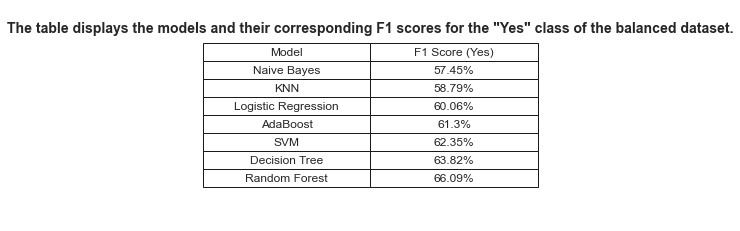

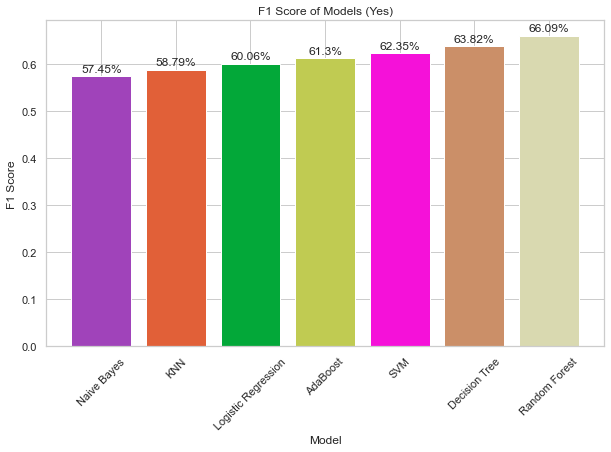

In [210]:
# Define the models and their respective F1 scores
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest',
          'AdaBoost', 'Naive Bayes', 'KNN']
f1_scores = [f1_score(y_test, y_pred_lr, pos_label='Yes'),
             f1_score(y_test, y_pred_dt, pos_label='Yes'),
             f1_score(y_test, y_pred_svm, pos_label='Yes'),
             f1_score(y_test, y_pred_rf, pos_label='Yes'),
             f1_score(y_test, y_pred_adaboost, pos_label='Yes'),
             f1_score(y_test, y_pred_naive_bayes, pos_label='Yes'),
             f1_score(y_test, y_pred_knn, pos_label='Yes')]

# Sort the models and F1 scores in the same order for the table and the bar chart
sorted_indices = np.argsort(f1_scores)
models_sorted = [models[i] for i in sorted_indices]
f1_scores_sorted = [f1_scores[i] for i in sorted_indices]

# Generate a list of random colors
random.seed(42)
colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(models))]

# Create a table to display the corresponding values with F1 scores
cell_text = [[model, f'{np.round(score * 100, 2)}%'] for model, score in zip(models_sorted, f1_scores_sorted)]
table = plt.table(cellText=cell_text,
                  colLabels=['Model', 'F1 Score (Yes)'],
                  cellLoc='center',
                  loc='center')

# Adjust the table layout
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(12)

# Hide the axis labels and ticks
plt.axis('off')

# Add a description above the table
description = 'The table displays the models and their corresponding F1 scores for the "Yes" class of the balanced dataset.'
plt.text(0.5, 0.9, description, ha='center', va='center', fontsize=14, fontweight='bold')

# Show the table
plt.show()


# Create a bar plot to visualize the F1 scores with different colors
plt.figure(figsize=(10, 6))
plt.bar(models_sorted, f1_scores_sorted, color=colors)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of Models (Yes)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add the accuracy values on top of each bar
for i, acc in enumerate(f1_scores_sorted):
    plt.text(i, acc + 0.01, f'{np.round(acc*100, 2)}%', ha='center')

# Show the plot
plt.show()


#### Accuracy  results visualizations

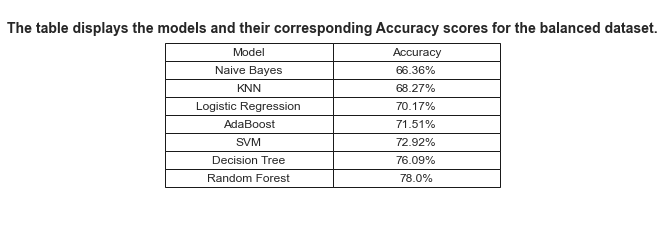

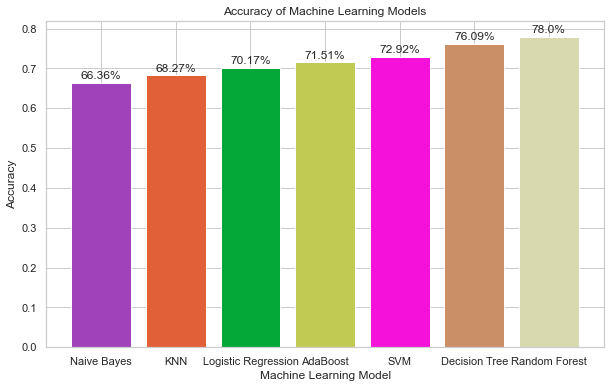

In [211]:
# Define the models and their respective accuracies
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest',
          'AdaBoost', 'Naive Bayes', 'KNN']
accuracies = [accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_adaboost),
              accuracy_score(y_test, y_pred_naive_bayes),
              accuracy_score(y_test, y_pred_knn)]

# Sort the models and accuracies in ascending order
sorted_indices = np.argsort(accuracies)
models_sorted = [models[i] for i in sorted_indices]
accuracies_sorted = [accuracies[i] for i in sorted_indices]

# Generate a list of random colors
random.seed(42)
colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(models))]

# Create a table to display the corresponding values with accuracy
cell_text = [[model, f'{np.round(acc*100, 2)}%'] for model, acc in zip(models_sorted, accuracies_sorted)]
table = plt.table(cellText=cell_text,
                  colLabels=['Model', 'Accuracy'],
                  cellLoc='center',
                  loc='center')

# Adjust the table layout
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(12)

# Hide the axis labels and ticks
plt.axis('off')

# Add a description above the table
description = 'The table displays the models and their corresponding Accuracy scores for the balanced dataset.'
plt.text(0.5, 0.9, description, ha='center', va='center', fontsize=14, fontweight='bold')

# Show the table
plt.show()

# Create a bar plot to visualize the accuracies with different colors
plt.figure(figsize=(10, 6))
plt.bar(models_sorted, accuracies_sorted, color=colors)

# Add labels and title
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')

# Add the accuracy values on top of each bar
for i, acc in enumerate(accuracies_sorted):
    plt.text(i, acc + 0.01, f'{np.round(acc*100, 2)}%', ha='center')

# Show the plot
plt.show()


### Interpretation of best model 

To gain a deeper understanding of the predictions made by our best-performing model, Random Forest, we employed the Local Interpretable Model-agnostic Explanations (LIME) technique, which allowed us to generate insightful interpretations of its decision-making process.

#### LIME summary

In [220]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create an instance of the RandomForestClassifier model
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Select only numeric columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# Perform data imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

# Perform data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize LIME explainer
explainer_lime = lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X_train_numeric.columns.tolist(), class_names=['0', '1'])

# Select a sample instance for explanation
sample_instance = X_test_scaled[0]

# Generate LIME explanation
lime_explanation = explainer_lime.explain_instance(sample_instance, model.predict_proba, num_features=len(X_train_numeric.columns))

# Print LIME explanation
lime_explanation.show_in_notebook(show_all=False)


Based on this interpretation, the model predicts a higher probability for class 0 (0.53) compared to class 1 (0.47). The monthlycharges and seniorcitizen features contribute more towards the prediction of class 1, while the tenure and totalcharges features have a stronger influence on the prediction of class 0.

#### SHAP summary plot

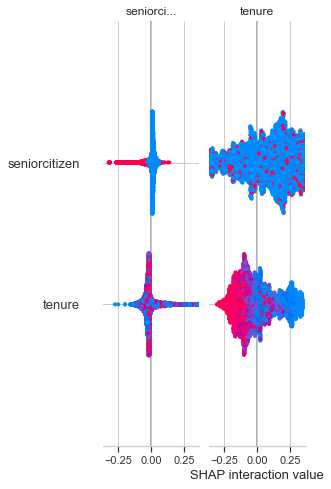

In [216]:
# Initialize SHAP explainer
explainer_shap = shap.Explainer(model)

# Generate SHAP values
shap_values = explainer_shap(X_train_scaled)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train_numeric, show=False, plot_size=(8, 6))
plt.show()


#### Hyperparameter Tuning (on Training Data)

In [217]:

# Dictionary containing the selected models
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {            
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'n_estimators': [10, 20, 50, 200, 200] 
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

# Loop through each model and train it using 5-fold cross-validation
for model_name, model_params in models.items():
    print('Training model: {}'.format(model_name))
    model = model_params['model']
    params = model_params['params']
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best score for {model_name}: {grid_search.best_score_}')
    print(f'Best estimator for {model_name}: {grid_search.best_estimator_}')
    


Training model: Random Forest
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.8428031275927717
Best estimator for Random Forest: RandomForestClassifier(n_estimators=200)
Training model: SVM
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best score for SVM: 0.7904027172635587
Best estimator for SVM: SVC(C=1)
Training model: Decision Tree
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.8140435017457671
Best estimator for Decision Tree: DecisionTreeClassifier(criterion='entropy')


Based on the hyperparameter tuning results, the Random Forest model achieved the highest score of 0.844, followed by the Decision Tree model with a score of 0.817, and the SVM model with a score of 0.79.

Considering these results, the recommendation would be to use the Random Forest model as it demonstrated the best performance on the training data. The Random Forest model benefits from its ability to handle complex relationships in the data, reduce overfitting through ensemble learning, and provide feature importance analysis.

### Save the model

To ensure future accessibility and reusability, it is recommended to save the best model using the pickle.

In [218]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as Telco_churn:
    pickle.dump(grid_search, Telco_churn)

### Model Deployment and Prediction (using the Trained Model)



In [219]:
# Use the best model to make predictions on the test data (X_test_scaled)
#test_predictions = best_model.predict(X_test_scaled)

# Make predictions on the validation data using the best model
#val_predictions = best_model.predict(X_val_scaled)

# Evaluate the performance of the best model on the validation data
#val_accuracy = accuracy_score(y_val_split, val_predictions)

# Perform any necessary post-processing or analysis on the test predictions
